In [22]:
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
from timeit import default_timer as timer
# needed to see images
from IPython.display import display, Image
import pickle
from sklearn.preprocessing import LabelBinarizer

# needed for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
current_palette = sns.color_palette()

from utils.eval_utils import load_data

## Plot Accuracy

In [23]:
def plotAcc(acc_over_time):
    fig = plt.figure(figsize=[12,7])
    plt.title('Accuracy Over Time', fontsize=20)
    if('RNN' in acc_over_time):
        plt.plot(np.array(acc_over_time['RNN'])[:,0], np.array(acc_over_time['RNN'])[:,1], label='RNN')
    if('CNN' in acc_over_time):
        plt.plot(np.array(acc_over_time['CNN'])[:,0], np.array(acc_over_time['CNN'])[:,1], label='CNN')
    if('DNN' in acc_over_time):
        plt.plot(np.array(acc_over_time['DNN'])[:,0], np.array(acc_over_time['DNN'])[:,1], label='DNN')
    plt.xlabel('Epoch', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Accuracy (%)', fontsize=18)
    plt.ylim([0, 100])
    plt.legend(loc="lower right", fontsize=18)
    plt.grid()
    plt.show()

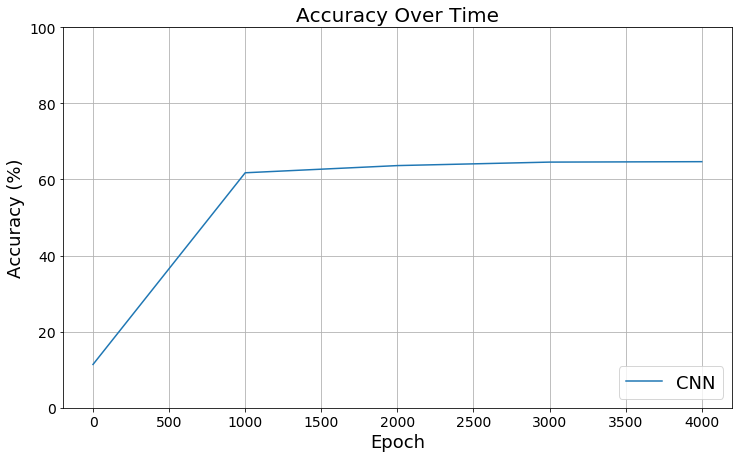

In [24]:
acc_over_time = load_data('data/dataset_acc.p')
plotAcc(acc_over_time)

## Plot ROC

In [51]:
def getkey(item):
    fpr, tpr, _ = roc_curve(test_labels.ravel(), test_preds[item])
    roc_auc = auc(fpr, tpr)
    return roc_auc

def plotROC(data):
    _, test_labels = data['CNN']
    classifiers = list(data.keys())

    # Plot all ROC curves
    plt.figure(figsize=(15,9))
    for i, clf in zip(range(len(classifiers)), sorted(classifiers, key=getkey, reverse=True)):
        test_preds, _ = data[clf]
        fpr, tpr, _ = roc_curve(test_labels.ravel(), test_preds)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
                 label='ROC curve '+ clf +  ' (area = {0:0.4f})'
                       ''.format(roc_auc), linestyle='-', linewidth=2)


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparison of multiclass ROC curves', fontsize=18)
    plt.legend(loc="lower right", fontsize=18)
    plt.grid()
    plt.show()

def plotROC_v1(testlabels, test_preds):
    classifiers = list(test_preds.keys())

    # Plot all ROC curves
    plt.figure(figsize=(15,9))
    for i, clf in zip(range(len(classifiers)), sorted(classifiers, key=getkey, reverse=True)):
        fpr, tpr, _ = roc_curve(testlabels.ravel(), test_preds[clf] )
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr,
                 label='ROC curve '+ clf +  ' (area = {0:0.4f})'
                       ''.format(roc_auc), linestyle='-', linewidth=2)


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparison of multiclass ROC curves', fontsize=18)
    plt.legend(loc="lower right", fontsize=18)
    plt.grid()
    plt.show()

(17470,) (1747, 10)


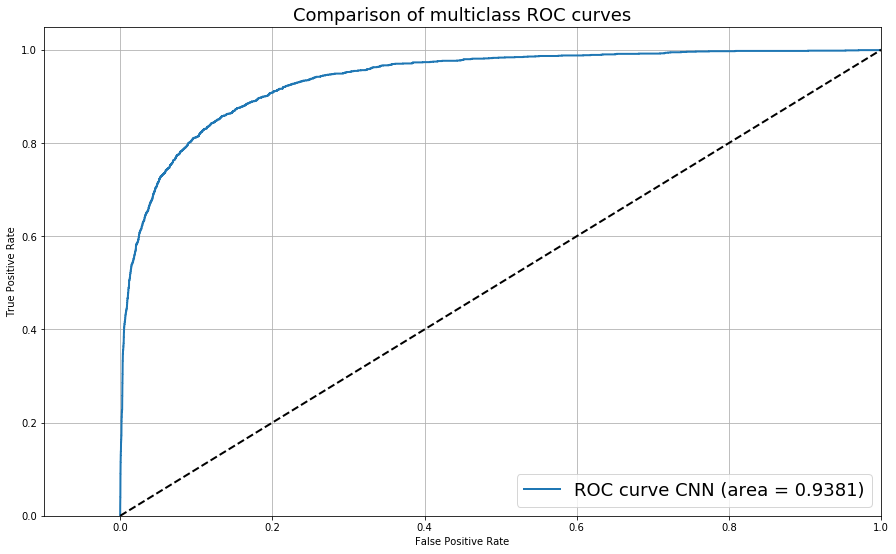

In [52]:
data = load_data('data/test_preds.p')
preds, labels = data['CNN']
print(preds.shape, labels.shape)
plotROC(data)

(17470,) (1747, 10)


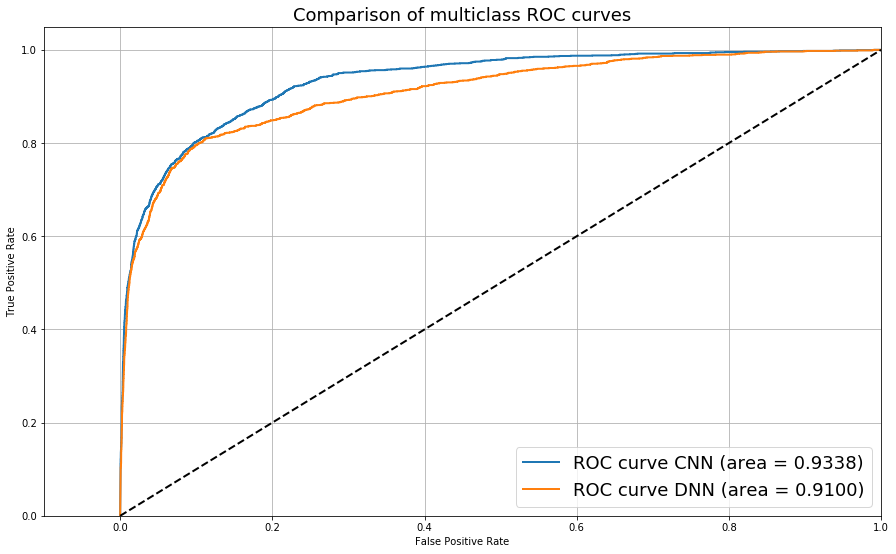

In [45]:
test_preds = load_data('dataset/test_preds.p')
test_labels = load_data('dataset/test_labels.p')
print(test_preds['CNN'].shape, test_labels.shape)
plotROC_v1(test_labels, test_preds)

In [38]:
# test_preds = load_data('data/test_preds.p')
# preds, labels = test_preds['CNN']
plotROC(test_preds, test_labels)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

## Plot Confusion Matrices

In [23]:
def confusion(true, predicted):
    matrix = np.zeros([10,10])
    pred = predicted.reshape((predicted.shape[0]//10, 10))

    count = 0
    for lab in test_batch:
        matrix[lab] += pred[count].round()
        count += 1
        
    return matrix

def plotConfusion(test_batch, test_preds, model_name):
    matrix = confusion(test_batch, test_preds[model_name])
    
    plt.figure(figsize=[10,10])
    plt.imshow(matrix, cmap='winter', interpolation='nearest',  vmin=0, vmax=200)
    plt.colorbar()
    plt.title('{} Confusion Map'.format(model_name, fontsize=18))
    plt.ylabel('Actual', fontsize=18)
    plt.xlabel('Predicted', fontsize=18)
    plt.grid(b=False)
    plt.yticks(range(10), le.classes_, fontsize=14)
    plt.xticks(range(10), le.classes_, fontsize=14, rotation='vertical')
    plt.show()

In [24]:
test = pickle.load(open('data/test.p', 'rb'))

# numeralize labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_batch = le.fit_transform(test['label'])


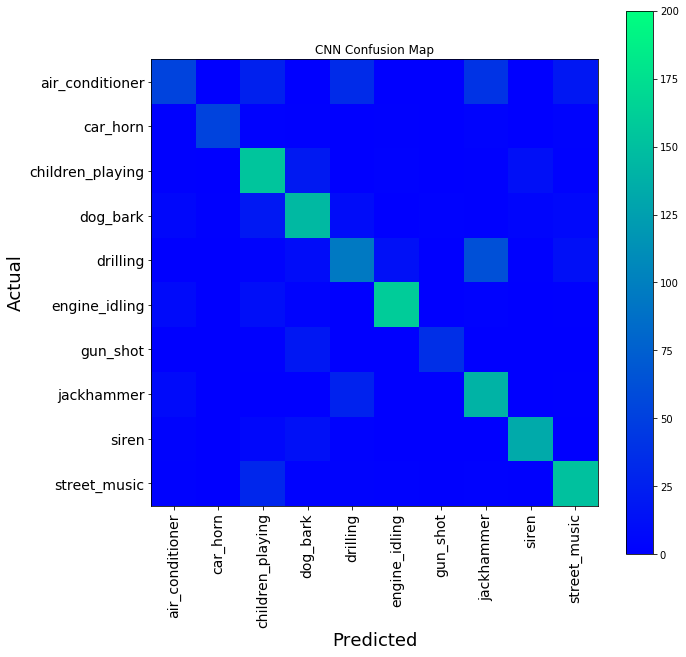

In [27]:
# Plot 'CNN' or 'DNN'
plotConfusion(test_batch, test_preds, 'CNN')